In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
train_df = pd.read_csv('train.csv')

In [3]:
train_df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [4]:
test_df = pd.read_csv('test.csv')
test_df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3
0,1000004,P00128942,M,46-50,7,B,2,1,1,11.0,NaN
1,1000009,P00113442,M,26-35,17,C,0,0,3,5.0,NaN
2,1000010,P00288442,F,36-45,1,B,4+,1,5,14.0,NaN
3,1000010,P00145342,F,36-45,1,B,4+,1,4,9.0,NaN
4,1000011,P00053842,F,26-35,1,C,1,0,4,5.0,12.0


In [5]:
## combine both train and test set for pre-processing
df=train_df.append(test_df)

In [6]:
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370.0
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200.0
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422.0
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057.0
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969.0


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 783667 entries, 0 to 233598
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     783667 non-null  int64  
 1   Product_ID                  783667 non-null  object 
 2   Gender                      783667 non-null  object 
 3   Age                         783667 non-null  object 
 4   Occupation                  783667 non-null  int64  
 5   City_Category               783667 non-null  object 
 6   Stay_In_Current_City_Years  783667 non-null  object 
 7   Marital_Status              783667 non-null  int64  
 8   Product_Category_1          783667 non-null  int64  
 9   Product_Category_2          537685 non-null  float64
 10  Product_Category_3          237858 non-null  float64
 11  Purchase                    550068 non-null  float64
dtypes: float64(3), int64(4), object(5)
memory usage: 77.7+ MB


In [8]:
df.drop(columns='User_ID',axis=1,inplace=True)

In [9]:
df.head()

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370.0
1,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200.0
2,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422.0
3,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057.0
4,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969.0


In [10]:
df['Age'].value_counts()

26-35    313015
36-45    156724
18-25    141953
46-50     65278
51-55     54784
55+       30579
0-17      21334
Name: Age, dtype: int64

In [11]:
df['Gender'].value_counts()

M    590031
F    193636
Name: Gender, dtype: int64

In [12]:
## Encoding Categorical Feature Gender
df['Gender']= df['Gender'].map({'F':0,'M':1})

In [13]:
df.head()

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,P00069042,0,0-17,10,A,2,0,3,NaN,NaN,8370.0
1,P00248942,0,0-17,10,A,2,0,1,6.0,14.0,15200.0
2,P00087842,0,0-17,10,A,2,0,12,NaN,NaN,1422.0
3,P00085442,0,0-17,10,A,2,0,12,14.0,NaN,1057.0
4,P00285442,1,55+,16,C,4+,0,8,NaN,NaN,7969.0


In [14]:
## Encoding Categorical Feature Age
df['Age']= df['Age'].map({'0-17':1,'18-25':2,'26-35':3,'36-45':4,'46-50':5,'51-55':6,'55+':7})

In [15]:
# from sklearn.preprocessing import LabelEncoder

# encoder = LabelEncoder()

# encoder.fit_transform(df['Age'])

In [16]:
df.tail()

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
233594,P00118942,0,3,15,B,4+,1,8,NaN,NaN,NaN
233595,P00254642,0,3,15,B,4+,1,5,8.0,NaN,NaN
233596,P00031842,0,3,15,B,4+,1,1,5.0,12.0,NaN
233597,P00124742,0,5,1,C,4+,0,10,16.0,NaN,NaN
233598,P00316642,0,5,0,B,4+,1,4,5.0,NaN,NaN


In [17]:
df['City_Category'].value_counts()

B    329739
C    243684
A    210244
Name: City_Category, dtype: int64

In [18]:
city_dummy= pd.get_dummies(df['City_Category'],drop_first=True)

In [19]:
df=pd.concat([df,city_dummy],axis=1)


In [20]:
df.drop(columns='City_Category',axis=1,inplace=True)

In [21]:
df.head()

,Product_ID,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,B,C
0,P00069042,0,1,10,2,0,3,NaN,NaN,8370.0,0,0
1,P00248942,0,1,10,2,0,1,6.0,14.0,15200.0,0,0
2,P00087842,0,1,10,2,0,12,NaN,NaN,1422.0,0,0
3,P00085442,0,1,10,2,0,12,14.0,NaN,1057.0,0,0
4,P00285442,1,7,16,4+,0,8,NaN,NaN,7969.0,0,1


In [22]:
df.isnull().sum()

Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            245982
Product_Category_3            545809
Purchase                      233599
B                                  0
C                                  0
dtype: int64

In [23]:
## Replacing Missing Values

df['Product_Category_1'].unique()

array([ 3,  1, 12,  8,  5,  4,  2,  6, 14, 11, 13, 15,  7, 16, 18, 10, 17,
        9, 20, 19], dtype=int64)

In [24]:
df['Product_Category_2'].unique()

array([nan,  6., 14.,  2.,  8., 15., 16., 11.,  5.,  3.,  4., 12.,  9.,
       10., 17., 13.,  7., 18.])

In [25]:
df['Product_Category_2']= df['Product_Category_2'].fillna(df['Product_Category_2'].mode()[0])

In [26]:
df['Product_Category_2'].unique()

array([ 8.,  6., 14.,  2., 15., 16., 11.,  5.,  3.,  4., 12.,  9., 10.,
       17., 13.,  7., 18.])

In [33]:
df['Product_Category_3']= df['Product_Category_3'].fillna(df['Product_Category_3'].mode()[0])

In [35]:
df.isnull().sum()

Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2                 0
Product_Category_3                 0
Purchase                      233599
B                                  0
C                                  0
dtype: int64

In [39]:
df['Stay_In_Current_City_Years'].unique()

array(['2', '4+', '3', '1', '0'], dtype=object)

In [40]:
df['Stay_In_Current_City_Years']=df['Stay_In_Current_City_Years'].replace('4+','4')

In [41]:
df['Stay_In_Current_City_Years'].unique()

array(['2', '4', '3', '1', '0'], dtype=object)

In [42]:
## type of this feature is still as object. so need to convert to integer
df['Stay_In_Current_City_Years']=df['Stay_In_Current_City_Years'].astype(int)

In [43]:
df['Stay_In_Current_City_Years'].unique()

array([2, 4, 3, 1, 0])

In [44]:
df['B']=df['B'].astype(int)
df['C']=df['C'].astype(int)

In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 783667 entries, 0 to 233598
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Product_ID                  783667 non-null  object 
 1   Gender                      783667 non-null  int64  
 2   Age                         783667 non-null  int64  
 3   Occupation                  783667 non-null  int64  
 4   Stay_In_Current_City_Years  783667 non-null  int32  
 5   Marital_Status              783667 non-null  int64  
 6   Product_Category_1          783667 non-null  int64  
 7   Product_Category_2          783667 non-null  float64
 8   Product_Category_3          783667 non-null  float64
 9   Purchase                    550068 non-null  float64
 10  B                           783667 non-null  int32  
 11  C                           783667 non-null  int32  
dtypes: float64(3), int32(3), int64(5), object(1)
memory usage: 68.8+ MB


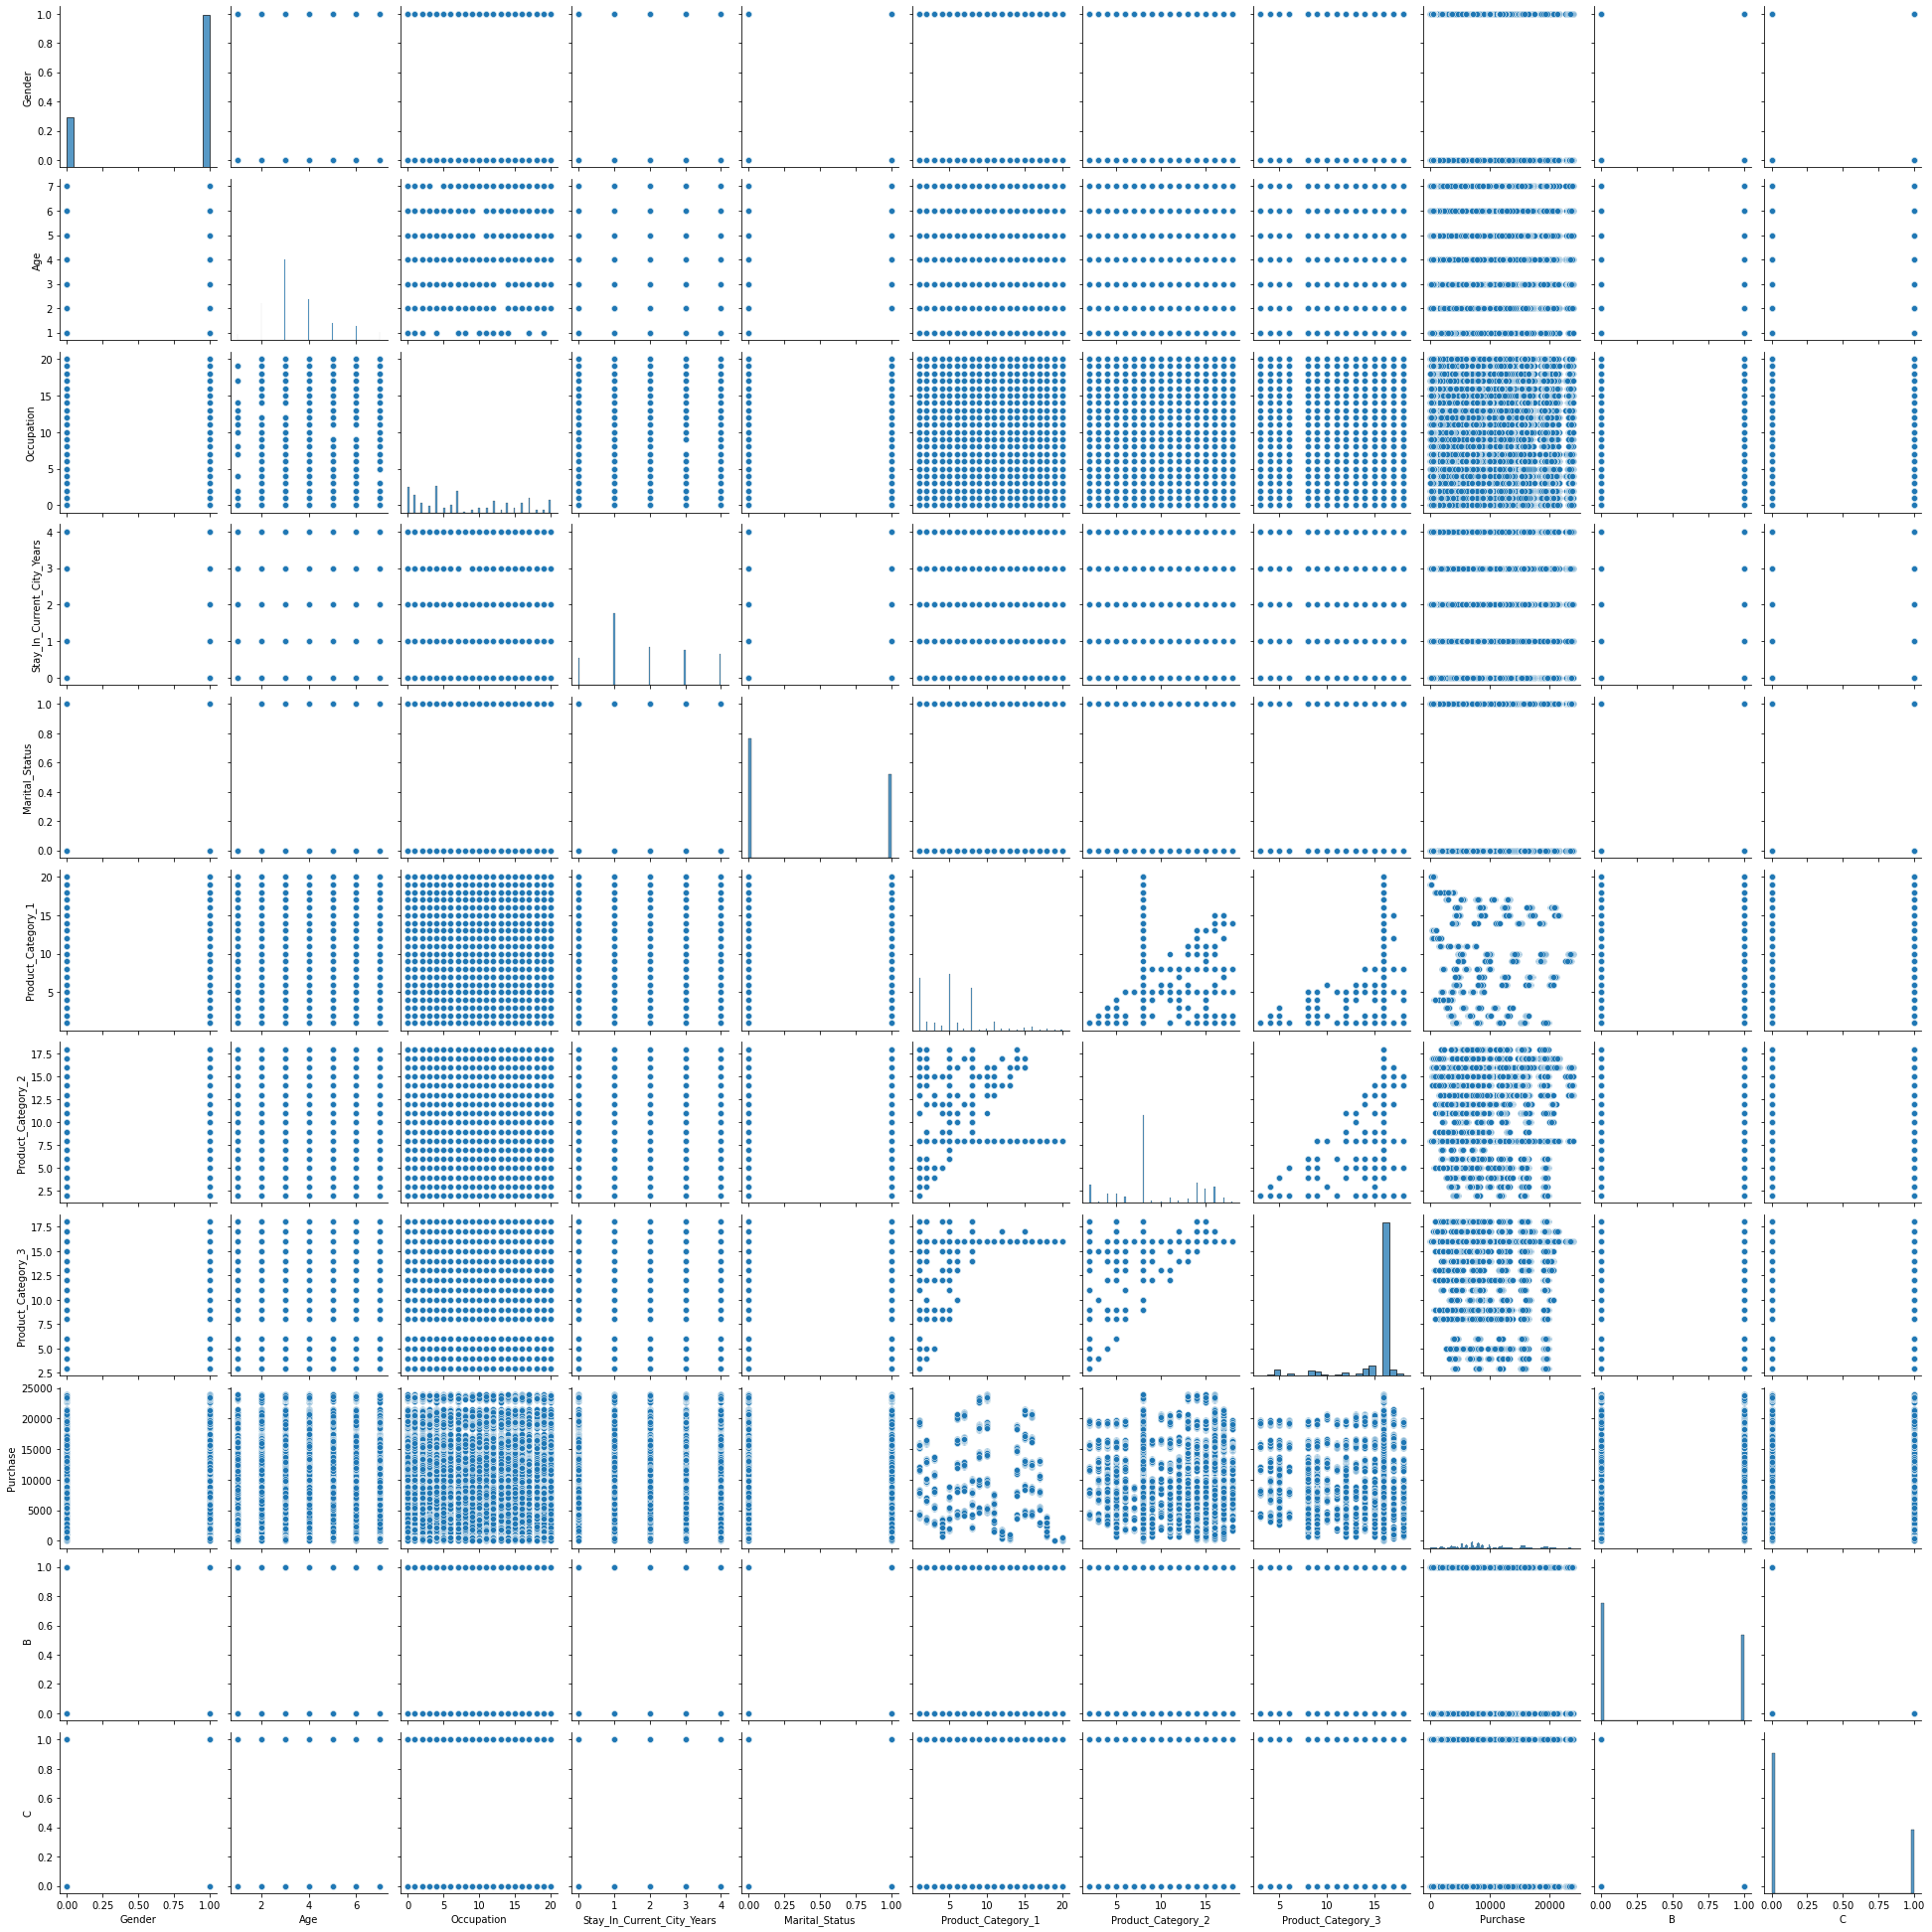

In [47]:
sns.pairplot(df)

C:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Age', ylabel='Purchase'>

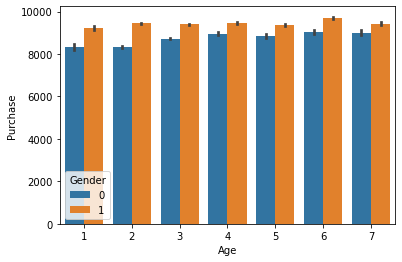

In [49]:
sns.barplot('Age','Purchase',hue='Gender',data=df)

C:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Occupation', ylabel='Purchase'>

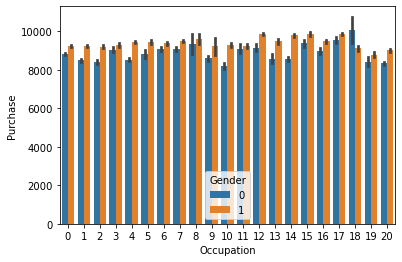

In [51]:
sns.barplot('Occupation','Purchase',hue='Gender',data=df)

C:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Product_Category_1', ylabel='Purchase'>

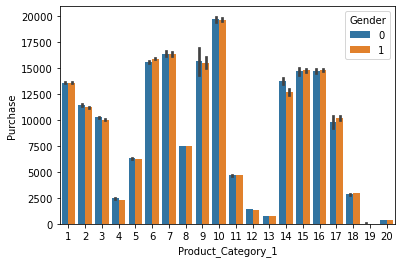

In [52]:
sns.barplot('Product_Category_1','Purchase',hue='Gender',data=df)

C:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Product_Category_2', ylabel='Purchase'>

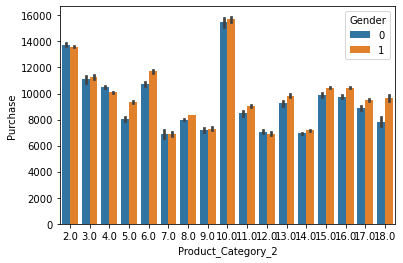

In [53]:
sns.barplot('Product_Category_2','Purchase',hue='Gender',data=df)

C:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Product_Category_3', ylabel='Purchase'>

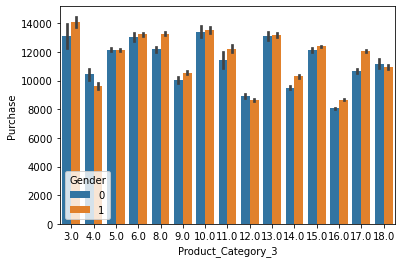

In [54]:
sns.barplot('Product_Category_3','Purchase',hue='Gender',data=df)

C:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Stay_In_Current_City_Years', ylabel='Purchase'>

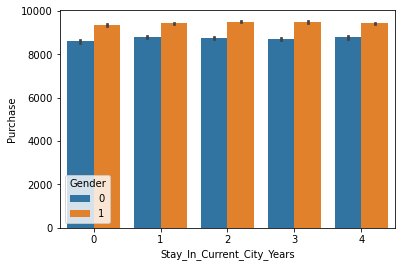

In [55]:
sns.barplot('Stay_In_Current_City_Years','Purchase',hue='Gender',data=df)

In [60]:
df.drop(columns='Product_ID',axis=1,inplace=True)

In [66]:
test_df = df[df['Purchase'].isnull()]
train_df = df[~df['Purchase'].isnull()]

In [67]:
print(train_df.shape)
print(test_df.shape)

(550068, 11)
(233599, 11)


In [68]:
X= train_df.drop(columns='Purchase',axis=1)

In [71]:
y= train_df['Purchase']
y

0          8370.0
1         15200.0
2          1422.0
3          1057.0
4          7969.0
           ...   
550063      368.0
550064      371.0
550065      137.0
550066      365.0
550067      490.0
Name: Purchase, Length: 550068, dtype: float64

In [72]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [74]:
## Feature Scaling

from sklearn.preprocessing import StandardScaler
sc= StandardScaler()
X_train= sc.fit_transform(X_train)
X_test= sc.fit_transform(X_test)

In [76]:
from sklearn.ensemble import GradientBoostingRegressor

model = GradientBoostingRegressor()

In [77]:
model.fit(X_train,y_train)
predictions= model.predict(X_test)

In [78]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [79]:
print(mean_absolute_error(y_test,predictions))
print(mean_squared_error(y_test,predictions))

2269.1604524248355
8959621.296924856


In [80]:
r2_score(y_test,predictions)

0.6444959838731028

In [93]:
feature_df=pd.DataFrame(model.feature_importances_.reshape(1,-1),columns=X.columns)
feature_df

,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,B,C
0,0.000087,0.000981,0.000752,0.000038,0.000014,0.980547,0.006891,0.00647,0.000184,0.004034


In [81]:
import xgboost as xgb

In [82]:
regressor = xgb.XGBRegressor(
    n_estimators=100,
    reg_lambda=1,
    gamma=0,
    max_depth=3
)

In [95]:
regressor.fit(X_train, y_train)
pd.DataFrame(regressor.feature_importances_.reshape(1, -1), columns=X.columns)

,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,B,C
0,0.003888,0.007127,0.004863,0.003617,0.003068,0.897552,0.015178,0.017329,0.007839,0.03954


In [96]:
predictions= regressor.predict(X_test)
print(mean_absolute_error(y_test,predictions))
print(mean_squared_error(y_test,predictions))
print(r2_score(y_test,predictions))

2227.990067063728
8740972.035441635
0.6531716508465657


In [97]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train,y_train)
predictions= lr.predict(X_test)
print(mean_absolute_error(y_test,predictions))
print(mean_squared_error(y_test,predictions))
print(r2_score(y_test,predictions))

3577.498587227752
21939113.563726615
0.12948965992057726


In [98]:
from sklearn.ensemble import RandomForestRegressor

rfr = RandomForestRegressor()
rfr.fit(X_train,y_train)
predictions= rfr.predict(X_test)
print(mean_absolute_error(y_test,predictions))
print(mean_squared_error(y_test,predictions))
print(r2_score(y_test,predictions))

2226.706657225779
9347509.159637585
0.6291051890580829


<AxesSubplot:xlabel='Purchase'>

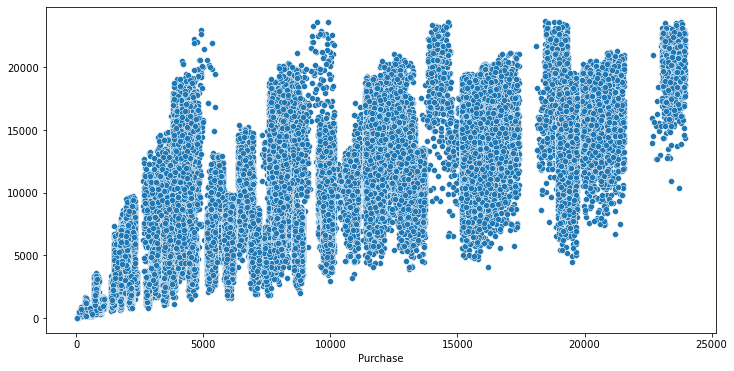

In [127]:
plt.figure(figsize=(12,6))
sns.scatterplot(x=y_test,y=predictions)

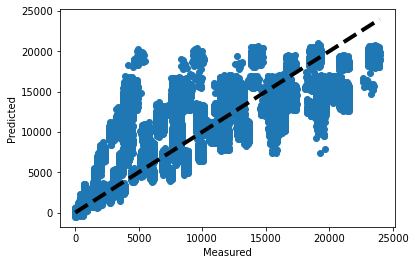

In [129]:
from sklearn import datasets
from sklearn.model_selection import cross_val_predict
from sklearn import linear_model
import matplotlib.pyplot as plt

#lr = linear_model.LinearRegression()
#boston = datasets.load_boston()
#y = boston.target

# cross_val_predict returns an array of the same size as `y` where each entry
# is a prediction obtained by cross validated:
predicted = cross_val_predict(regressor, X_test, y_test, cv=10)

fig, ax = plt.subplots()
ax.scatter(y_test, predicted)
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()

In [130]:
predicted

array([15018.94  , 13284.783 ,  7397.3037, ..., 10477.664 , 13908.642 ,
       13029.017 ], dtype=float32)

In [131]:
print(mean_absolute_error(y_test,predicted))
print(mean_squared_error(y_test,predicted))
print(r2_score(y_test,predicted))

2228.9588463511263
8760719.988787344
0.6523880823795485
